# Code for post about social acceptance risk

Emilio Lehoucq

2/24/2023

## Loading libraries and helper function

In [1]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt

The three following cells 1) clone [this GitHub repository](https://github.com/emiliolehoucq/linkedin_posts) into the [current working directory](https://data-flair.training/blogs/python-directory/#:~:text=To%20find%20out%20which%20directory,use%20the%20getcwd()%20method.&text=Cwd%20is%20for%20current%20working,use%20the%20method%20getcwdb().), 2) load a helper function into the notebook, and 3) remove the directory with the clone of the GitHub repository.

The helper function can be saved to the notebook.

The cell that loads the helper function into the current notebook doesn't run the code automatically. After loading the helper function, you need to run the cell.

To read more about how to clone a GitHub repository and how to remove a directory, see:
- https://stackoverflow.com/questions/52741983/import-a-github-into-jupyter-notebook-directly
- https://stackoverflow.com/questions/43756284/how-to-remove-a-directory-including-all-its-files-in-python

In [2]:
%%bash
git clone https://github.com/emiliolehoucq/linkedin_posts

Cloning into 'linkedin_posts'...


In [3]:
# %load linkedin_posts/code/helper_functions/my_weights.py
# I've only used this function with limited data and haven't tested it --Emilio Lehoucq 3/14/23

def weights_univariate(df, col_name, weight_name, percentages = False, rounded = False):
    """
    Function to calculate weighted proportions or percentages.
    
    Input:
        df (dataframe). Pandas dataframe.
        col_name (string). Name of the column to weight.
        weight_name (string). Name of the column with the weights.
        percentages (Boolean). Output percentages rather than proportions (default).
        rounded (Boolean). Round output to two decimals (defaults to False).
    Output:
        Pandas series with weighted proportions or percentages.
    
    Dependencies:
        The function doesn't automatically load any library, but it's designed to work with Pandas.
    
    Code inspired from:
        - https://towardsdatascience.com/how-to-analyze-survey-data-with-python-84eff9cc9568
    """
    # Subset data and group by col_name:
    grouped_data = df[[col_name, weight_name]].groupby(col_name)

    # Calculate number of weighted observations per group and in total:
    counts_per_group = grouped_data.sum()[weight_name]
    total_count = sum(counts_per_group)

    # Calculate proportions or percentages:
    if percentages: result = counts_per_group * 100 / total_count
    else: result = counts_per_group / total_count
    
    # Return result rounded or not:
    if rounded: return round(result, 2)
    else: return result

In [4]:
shutil.rmtree("linkedin_posts")

## Paths

In [5]:
data_path = '../../data/'
plots_path = '../../plots/published/'
plot_name = '3_14_2023.png'

## Reading data

In [6]:
data = pd.read_spss(data_path + 'pew_atp_w_49.sav')

## Cleaning data

In [7]:
INDEX_START_W49 = -4

for column in data.columns.tolist():
    # Drop W_49 from end of column names:
    if column[INDEX_START_W49:] == '_W49':
        data.rename(columns = {column: column[:INDEX_START_W49]}, inplace = True)

## Exploring data

In [8]:
columns_of_interest = [['CONCERNCO', 'How concerned are you, if at all, about how companies are using the data they collect about you?'],
                       ['CONCERNGOV', 'How concerned are you, if at all, about how the government is using the data it collects about you?'],
                       ['BENEFITCO', 'How much do you feel you personally benefit from the data that companies collect about you?'],
                       ['BENEFITGOV', 'How much do you feel you personally benefit from the data the government collects about you?'],
                       ['POSNEGCO', 'On balance, which would you say most accurately describes how you feel?'],
                       ['POSNEGGOV','On balance, which would you say most accurately describes how you feel?']]

INDEX_NAME = 0
INDEX_QUESTION = 1

for column in columns_of_interest:
    print(f'\n{column[INDEX_NAME]}: {column[INDEX_QUESTION]}')
    print(f'Percentage missing values: {round(data[column[INDEX_NAME]].isnull().mean() * 100, 2)}')
    
# Company questions assigned to FORM=1 and government questions assigned to FORM=2


CONCERNCO: How concerned are you, if at all, about how companies are using the data they collect about you?
Percentage missing values: 49.91

CONCERNGOV: How concerned are you, if at all, about how the government is using the data it collects about you?
Percentage missing values: 50.09

BENEFITCO: How much do you feel you personally benefit from the data that companies collect about you?
Percentage missing values: 49.91

BENEFITGOV: How much do you feel you personally benefit from the data the government collects about you?
Percentage missing values: 50.09

POSNEGCO: On balance, which would you say most accurately describes how you feel?
Percentage missing values: 49.91

POSNEGGOV: On balance, which would you say most accurately describes how you feel?
Percentage missing values: 50.09


How concerned are you, if at all, about how companies are using the data they collect about you?

Unweighted:
Not at all concerned    0.03
Not too concerned       0.17
Refused                 0.00
Somewhat concerned      0.43
Very concerned          0.37
Name: CONCERNCO, dtype: float64

Weighted:
CONCERNCO
Not at all concerned    0.04
Not too concerned       0.17
Refused                 0.00
Somewhat concerned      0.43
Very concerned          0.36
Name: WEIGHT, dtype: float64


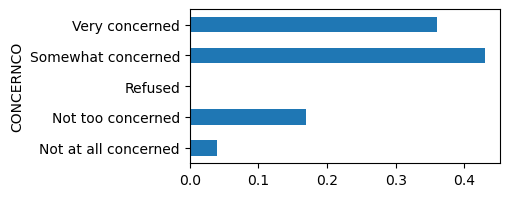

How concerned are you, if at all, about how the government is using the data it collects about you?

Unweighted:
Not at all concerned    0.09
Not too concerned       0.26
Refused                 0.00
Somewhat concerned      0.38
Very concerned          0.26
Name: CONCERNGOV, dtype: float64

Weighted:
CONCERNGOV
Not at all concerned    0.10
Not too concerned       0.26
Refused                 0.00
Somewhat concerned      0.39
Very concerned          0.25
Name: WEIGHT, dtype: float64


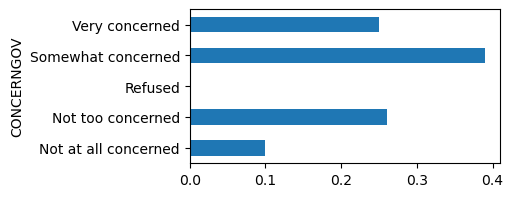

How much do you feel you personally benefit from the data that companies collect about you?

Unweighted:
A great deal    0.04
None            0.23
Refused         0.00
Some            0.23
Very little     0.50
Name: BENEFITCO, dtype: float64

Weighted:
BENEFITCO
A great deal    0.05
None            0.23
Refused         0.00
Some            0.23
Very little     0.49
Name: WEIGHT, dtype: float64


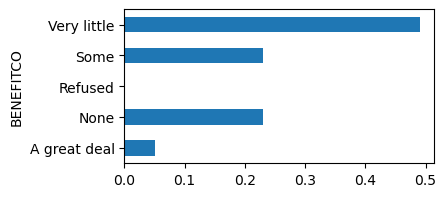

How much do you feel you personally benefit from the data the government collects about you?

Unweighted:
A great deal    0.04
None            0.34
Refused         0.01
Some            0.18
Very little     0.43
Name: BENEFITGOV, dtype: float64

Weighted:
BENEFITGOV
A great deal    0.04
None            0.34
Refused         0.01
Some            0.19
Very little     0.42
Name: WEIGHT, dtype: float64


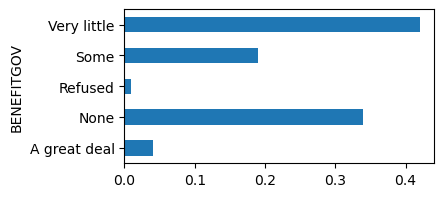

On balance, which would you say most accurately describes how you feel?

Unweighted:
Refused                                                                                    0.02
The benefits I get from companies collecting data about me outweigh the potential risks    0.17
The potential risks of companies collecting data about me outweigh the benefits I get      0.82
Name: POSNEGCO, dtype: float64

Weighted:
POSNEGCO
Refused                                                                                    0.02
The benefits I get from companies collecting data about me outweigh the potential risks    0.17
The potential risks of companies collecting data about me outweigh the benefits I get      0.81
Name: WEIGHT, dtype: float64


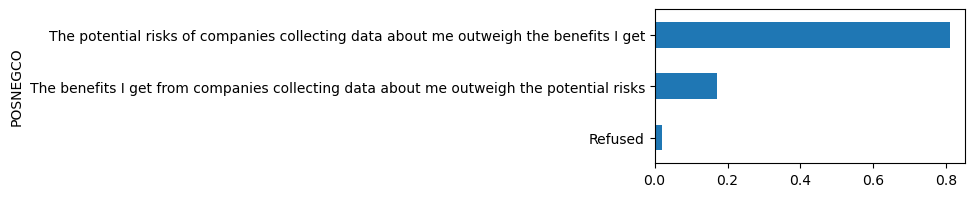

On balance, which would you say most accurately describes how you feel?

Unweighted:
Refused                                                                                                           0.03
The benefits the government can provide by collecting data about me and others outweigh the potential risks       0.32
The potential risks of the government collecting data about me and others outweigh the benefits it can provide    0.65
Name: POSNEGGOV, dtype: float64

Weighted:
POSNEGGOV
Refused                                                                                                           0.04
The benefits the government can provide by collecting data about me and others outweigh the potential risks       0.31
The potential risks of the government collecting data about me and others outweigh the benefits it can provide    0.66
Name: WEIGHT, dtype: float64


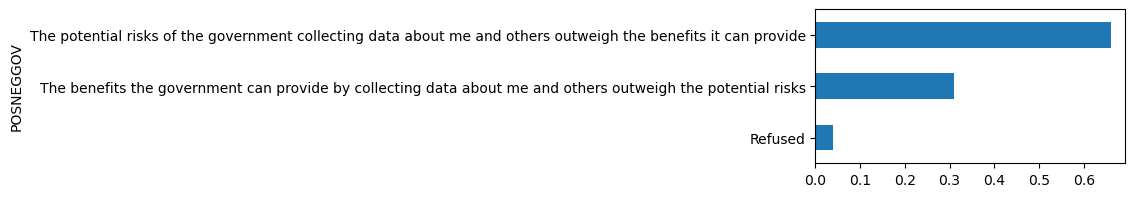

In [9]:
for column in columns_of_interest:
    print('====================================================================')
    print(column[INDEX_QUESTION])
    print('\nUnweighted:')
    print(round(data[column[INDEX_NAME]].value_counts(normalize = True).sort_index(), 2))
    print('\nWeighted:')
    wp = weights_univariate(data, column[INDEX_NAME], 'WEIGHT', rounded = True)
    print(wp)
    fig = plt.figure(figsize = (4, 2))
    ax = fig.add_subplot()
    wp.sort_index().plot(kind = 'barh')
    plt.show()

## Plot for post

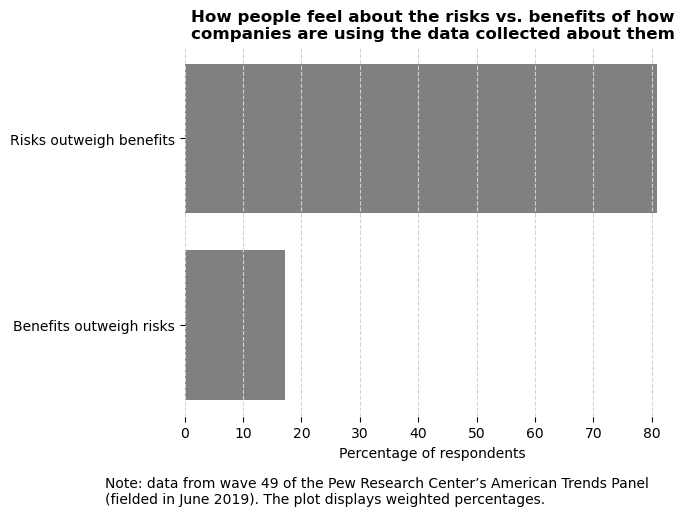

In [10]:
keys = ['Benefits outweigh risks', 'Risks outweigh benefits']
values = weights_univariate(data, 'POSNEGCO', 'WEIGHT', percentages = True).tolist()[1:]

fig = plt.figure()
ax = fig.add_subplot()

ax.barh(keys, values, color = 'gray')
plt.title('How people feel about the risks vs. benefits of how\ncompanies are using the data collected about them', fontweight = "bold")
plt.xlabel('Percentage of respondents')
fig.text(0, -0.07, 'Note: data from wave 49 of the Pew Research Center’s American Trends Panel\n(fielded in June 2019). The plot displays weighted percentages.')

ax.xaxis.grid(linestyle = '--', color = 'lightgrey')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig(plots_path + plot_name, bbox_inches = 'tight', dpi = 120)